In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder  
import numpy as np

# Preprocessing

## Calendar

In [2]:
def preprocessing_calendar(df):
    
    # 1. remove $ sign
    
    df = df.replace('\$', '', regex=True).replace(',', '', regex=True)
    df['price'] = df['price'].astype('float')
    df['adjusted_price'] = df['adjusted_price'].astype('float')
    
    # 2. encoding
    
    encoder = LabelEncoder()       
    df['available'] = encoder.fit_transform(df['available'])
    
    # 3. Time series data
    
    
    
    return df

## listings

In [3]:
Washington_listings = pd.read_csv('dataset/Washington, D.C., District of Columbia_listings.csv')
Washington_listings

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3686,https://www.airbnb.com/rooms/3686,20201024055559,2020-10-24,Vita's Hideaway,IMPORTANT NOTES<br />* Carefully read and be s...,We love that our neighborhood is up and coming...,https://a0.muscache.com/pictures/61e02c7e-3d66...,4645,https://www.airbnb.com/users/show/4645,...,10.0,8.0,9.0,NaN,f,2,0,2,0,0.60
1,3943,https://www.airbnb.com/rooms/3943,20201024055559,2020-10-24,Historic Rowhouse Near Monuments,Please contact us before booking to make sure ...,Our rowhouse is centrally located in the heart...,https://a0.muscache.com/pictures/432713/fab7dd...,5059,https://www.airbnb.com/users/show/5059,...,10.0,9.0,9.0,NaN,f,2,0,2,0,3.07
2,4197,https://www.airbnb.com/rooms/4197,20201024055559,2020-10-24,Bedroom in DC 2 blocks to Metro,This is the middle bedroom upstairs in a resto...,"Our area, the Eastern Market neighborhood of C...",https://a0.muscache.com/pictures/5e2bd169-b14f...,5061,https://www.airbnb.com/users/show/5061,...,10.0,10.0,10.0,NaN,f,2,0,2,0,0.32
3,4529,https://www.airbnb.com/rooms/4529,20201024055559,2020-10-24,Bertina's House Part One,This is large private bedroom with plenty of...,Very quiet neighborhood and it is easy accessi...,https://a0.muscache.com/pictures/86072003/6709...,5803,https://www.airbnb.com/users/show/5803,...,10.0,9.0,10.0,NaN,f,1,0,1,0,0.75
4,4967,https://www.airbnb.com/rooms/4967,20201024055559,2020-10-24,"DC, Near Metro","<b>The space</b><br />Hello, my name is Seveer...",NaN,https://a0.muscache.com/pictures/2439810/bb320...,7086,https://www.airbnb.com/users/show/7086,...,10.0,8.0,9.0,NaN,f,3,0,3,0,0.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7477,46017704,https://www.airbnb.com/rooms/46017704,20201024055559,2020-10-24,Cozy apartment for you | 1BR in Washington,Stay for 30+ nights (minimum nights and rates ...,NaN,https://a0.muscache.com/pictures/14b89495-726f...,368944610,https://www.airbnb.com/users/show/368944610,...,NaN,NaN,NaN,NaN,t,93,93,0,0,NaN
7478,46020813,https://www.airbnb.com/rooms/46020813,20201024055559,2020-10-24,Relax in comfort | 2BR in Washington,Stay for 90+ nights where you’ll have the enti...,NaN,https://a0.muscache.com/pictures/19361a20-ff51...,359230893,https://www.airbnb.com/users/show/359230893,...,NaN,NaN,NaN,NaN,t,162,162,0,0,NaN
7479,46023116,https://www.airbnb.com/rooms/46023116,20201024055559,2020-10-24,Lux Condo * Full Laundry * H St.+Union Market,WALK SCORE OF 85! Just steps to Union Market d...,NaN,https://a0.muscache.com/pictures/89b9289b-f942...,69229879,https://www.airbnb.com/users/show/69229879,...,NaN,NaN,NaN,NaN,f,5,5,0,0,NaN
7480,46023387,https://www.airbnb.com/rooms/46023387,20201024055559,2020-10-24,The Beaux - Chic Urban Multi-Level Tiny House,The Beaux - Brand new modern spacious multi-le...,"Takoma, Washington, DC, is a friendly and beau...",https://a0.muscache.com/pictures/df7c2e9c-4e88...,130123623,https://www.airbnb.com/users/show/130123623,...,NaN,NaN,NaN,NaN,t,2,2,0,0,NaN


In [4]:
print('#. of Nan', '\t', 'column name')
print() 

for idx, val in enumerate(Washington_listings.isna().sum()):
    print(val, '\t'*2, Washington_listings.columns[idx])

#. of Nan 	 column name

0 		 id
0 		 listing_url
0 		 scrape_id
0 		 last_scraped
1 		 name
123 		 description
2561 		 neighborhood_overview
0 		 picture_url
0 		 host_id
0 		 host_url
0 		 host_name
0 		 host_since
16 		 host_location
2769 		 host_about
2596 		 host_response_time
2596 		 host_response_rate
2065 		 host_acceptance_rate
0 		 host_is_superhost
0 		 host_thumbnail_url
0 		 host_picture_url
689 		 host_neighbourhood
0 		 host_listings_count
0 		 host_total_listings_count
0 		 host_verifications
0 		 host_has_profile_pic
0 		 host_identity_verified
2561 		 neighbourhood
0 		 neighbourhood_cleansed
7482 		 neighbourhood_group_cleansed
0 		 latitude
0 		 longitude
0 		 property_type
0 		 room_type
0 		 accommodates
7482 		 bathrooms
6 		 bathrooms_text
737 		 bedrooms
35 		 beds
0 		 amenities
0 		 price
0 		 minimum_nights
0 		 maximum_nights
0 		 minimum_minimum_nights
0 		 maximum_minimum_nights
0 		 minimum_maximum_nights
0 		 maximum_maximum_nights
0 		 minimum_nights_a

In [5]:
Washington_listings.shape

(7482, 74)

In [6]:
def list_count(string):
    return len(string.split(','))

def split_first(string):
    if type(string)==float:
        return np.nan
    
    else:
        return float(string.split(' ')[0])

    
    

def preprocessing_listings(df):
    
    save = df.copy()
    
    # 1. remove unnecessary columns
    
    df = df.drop(['listing_url', 'scrape_id', 'last_scraped', 'name', 'host_id', 'description', 'picture_url', 
                  'host_thumbnail_url', 'neighborhood_overview', 'host_url', 'host_name', 'host_location', 'host_about', 
                  'host_picture_url', 'host_total_listings_count', 'neighbourhood', 'host_verifications', 'property_type',
                 'minimum_minimum_nights', 'minimum_maximum_nights', 'maximum_minimum_nights', 'maximum_maximum_nights',
                 'has_availability', 'calendar_last_scraped', 'first_review', 'last_review',
                 'host_listings_count', 'number_of_reviews', 'number_of_reviews_l30d', 'host_response_rate', 
                  'host_acceptance_rate', 'host_neighbourhood', 'calculated_host_listings_count_entire_homes',
                  'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'], axis=1)
    
    # host_name은 host_id로 설명 가능해서 제거, name과 host_about, url들은 마땅히 할 수 있는 것이 없어서 제거 
    # (숙소사진, 호스트사진 포함), 
    # description, neighborhood_overview에 있는 내용은 다른 컬럼들로 설명가능하기에 삭제
    # host_total_listings_count와 host_listings_count는 아래 그림에서 보이듯이(corr) calculated_host_listings_count로 대체 가능하므로 삭제
    # 또한 calculated_host_listings_count_entire_homes, calculated_host_listings_count_private_rooms, 
    # calculated_host_listings_count_shared_rooms 또한 calculated_host_listings_count로 대체 가능하므로 삭제
    # neighbourhood는 neighbourhood_cleansed로 설명가능하므로 삭제
    # host_verification은 host_identity_verified로 설명되어있으므로 삭제
    # property_type은 room_type로 설명될 수 있으므로 삭제
    # minimum_minimum_nights, minimum_maximum_nights, maximum_minimum_nights, maximum_maximum_nights는 아래 그림에서 볼 수 있듯이
    # minimum_nights_ntm, maximum_nights_ntm과 상관관계가 높게 나오므로 삭제
    # has_availability는 availability_30, availability_60, availability_90, availability_365로 설명가능할 것이므로 삭제
    # number_of_reviews랑 number_of_reviews_l30d는 number_of_reviews_ltm으로 설명가능하므로 삭제 (밑에 corr 그림 참조)
    # host_response_rate는 주관적이고, 이거랑 host_acceptance_rate는 객관적인 host_response_time으로 대체 가능하므로 삭제 (밑에 corr 그림 참조)
    # host_neighbourhood랑 host_location은 host가 숙소근처에 있는지 여부가 중요한 변수가 될 수 있으므로 포함시키는 것이 좋을 수도 있다. 
    # 하지만 host_response_time으로 대체가능할 것이므로 삭제함
    
    
    # 2. 70%이상이 null 인경우 drop 시키기 
    # (drop 시킬 떄 문제점: 뒤에 있는 전처리 과정에서 충돌이 생길 수도 있고, host_response_time과 같은 중요한 정보를 삭제할 수 있다)
    
    for col in df.columns:
        series = df[col]
        if  series.isna().sum() / df.shape[0] > 0.7:
            df = df.drop(col, axis=1)
    
    # 3. 나머지 결측값있는 행 싸그리 제거
      
    df = df.dropna(axis=0).reset_index(drop=True)
    
    # 4. remove $ sign
    
    df['price'] = df['price'].replace('\$', '', regex=True).replace(',', '', regex=True)
    df['price'] = df['price'].astype('float')
    
    # 5. host_since를 상관관계 분석 용도로 현재 날짜-host_since를 계산해서 일수 (자연수)로 만드는 전처리 
    
    latest = pd.to_datetime(save['last_scraped'], format = '%Y-%m-%d')
    since = pd.to_datetime(save['host_since'], format = '%Y-%m-%d')

    df['host_since'] = (latest - since).dt.days
    
    # 6. 인코딩
    
    encoder = LabelEncoder()       
    df['host_is_superhost'] = encoder.fit_transform(df['host_is_superhost'])
    df['host_has_profile_pic'] = encoder.fit_transform(df['host_has_profile_pic'])
    df['host_identity_verified'] = encoder.fit_transform(df['host_identity_verified'])
    df['room_type'] = encoder.fit_transform(df['room_type'])
    df['instant_bookable'] = encoder.fit_transform(df['instant_bookable'])
    df['host_response_time'] = df['host_response_time'].replace({'within an hour' : 4, 'within a few hours' : 3, 'within a day' : 2, 'a few days or more': 1})
    df['neighbourhood_cleansed'] = encoder.fit_transform(df['neighbourhood_cleansed'])
    
    # host_verification은 host의 본인인증정보이다 --> 리스트를 len으로 해서 얼마나 신뢰가능한 호스트인지 확인할 수 있도록 전처리
    #    (아마도 is_superhost와 상관관계가 높게나오지 않을까.)
    # 의문점: host_identity_verified는 뭐지? f가 나오는 값들은 어떤 특징들이 있을까?? --> 보류
    
    # 7. amenities를 개수로 바꿈
    
    df['amenities'] = df['amenities'].apply(list_count)
    
    # 8. bathrooms_text 에서 bathroom 개수만 뽑아냄
    
    searchfor = ['half', 'Half']
    
    tmp = df['bathrooms_text']
    
    for idx in tmp[tmp.str.contains('|'.join(searchfor))].index:
        df.loc[idx, 'bathrooms_text'] = '0.5'

    df['bathrooms_text'] = df['bathrooms_text'].apply(split_first)
    
    # 9. review 요소들을 합쳐서 하나로 만듦 (평균값)
    
    df['reviews'] = (df['review_scores_accuracy'] + df['review_scores_cleanliness'] + df['review_scores_checkin'] + df['review_scores_communication'] + df['review_scores_location'] + df['review_scores_value']) / 6
    df = df.drop(['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'], axis=1)
    
    return df

In [7]:
preprocessed = preprocessing_listings(Washington_listings)

print('#. of Nan', '\t', 'column name')
print() 

for idx, val in enumerate(preprocessed.isna().sum()):
    print(val, '\t'*2, preprocessed.columns[idx])

#. of Nan 	 column name

0 		 id
0 		 host_since
0 		 host_response_time
0 		 host_is_superhost
0 		 host_has_profile_pic
0 		 host_identity_verified
0 		 neighbourhood_cleansed
0 		 latitude
0 		 longitude
0 		 room_type
0 		 accommodates
0 		 bathrooms_text
0 		 bedrooms
0 		 beds
0 		 amenities
0 		 price
0 		 minimum_nights
0 		 maximum_nights
0 		 minimum_nights_avg_ntm
0 		 maximum_nights_avg_ntm
0 		 availability_30
0 		 availability_60
0 		 availability_90
0 		 availability_365
0 		 number_of_reviews_ltm
0 		 review_scores_rating
0 		 instant_bookable
0 		 calculated_host_listings_count
0 		 reviews_per_month
0 		 reviews


In [8]:
preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3411 entries, 0 to 3410
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3411 non-null   int64  
 1   host_since                      3411 non-null   int64  
 2   host_response_time              3411 non-null   int64  
 3   host_is_superhost               3411 non-null   int32  
 4   host_has_profile_pic            3411 non-null   int32  
 5   host_identity_verified          3411 non-null   int32  
 6   neighbourhood_cleansed          3411 non-null   int32  
 7   latitude                        3411 non-null   float64
 8   longitude                       3411 non-null   float64
 9   room_type                       3411 non-null   int32  
 10  accommodates                    3411 non-null   int64  
 11  bathrooms_text                  3411 non-null   float64
 12  bedrooms                        34

In [9]:
preprocessed.shape

(3411, 30)

<AxesSubplot:>

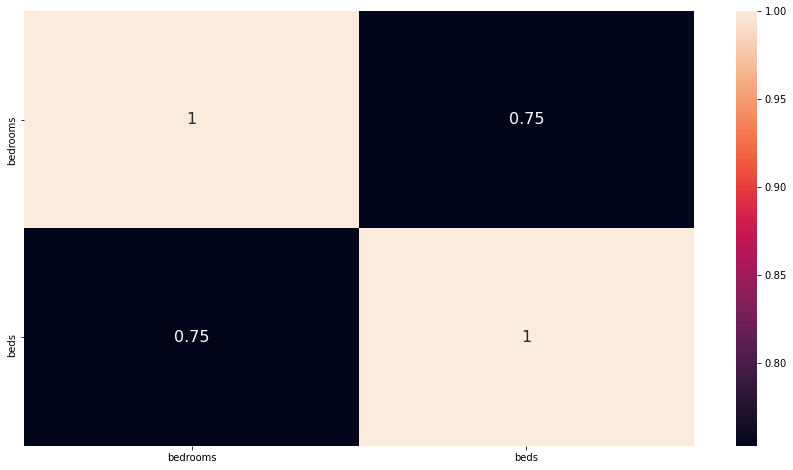

In [10]:
corr = preprocessed[['bedrooms', 'beds']].corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, annot_kws = {"size" : 16})

<AxesSubplot:>

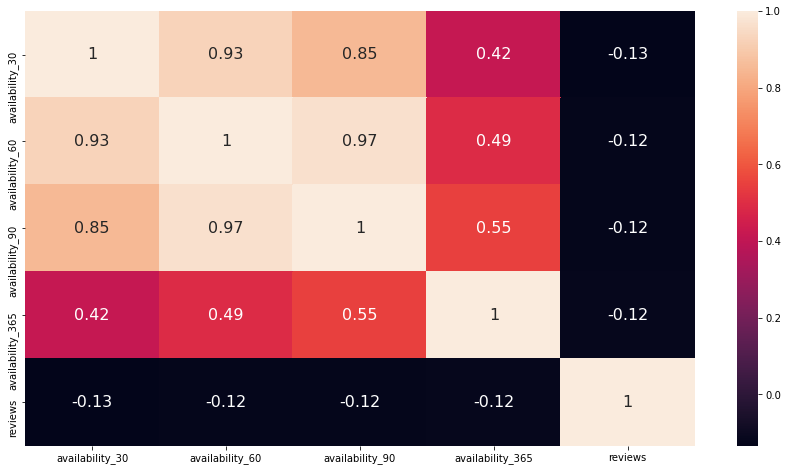

In [11]:
corr = preprocessed[['availability_30', 'availability_60', 'availability_90', 'availability_365', 'reviews']].corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, annot_kws = {"size" : 16})

<AxesSubplot:>

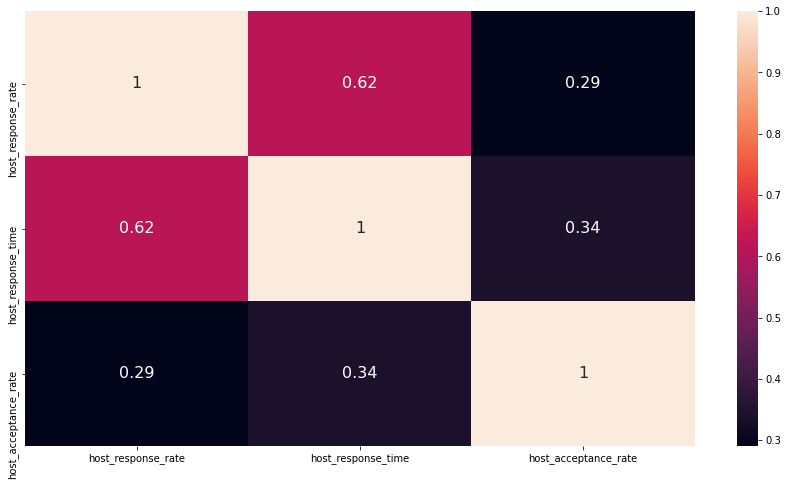

In [12]:
tmp = Washington_listings[['host_response_rate', 'host_response_time', 'host_acceptance_rate']]

tmp = tmp.dropna(axis=0)

tmp['host_response_rate'] = tmp['host_response_rate'].replace('\%', '', regex=True).astype('float')

tmp['host_acceptance_rate'] = tmp['host_acceptance_rate'].replace('\%', '', regex=True).astype('float')

tmp['host_response_time'] = tmp['host_response_time'].replace({ 'within an hour' : 4, 'within a few hours' : 3, 'within a day' : 2, 'a few days or more': 1})

corr = tmp[['host_response_rate', 'host_response_time', 'host_acceptance_rate']].corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, annot_kws = {"size" : 16})

<AxesSubplot:>

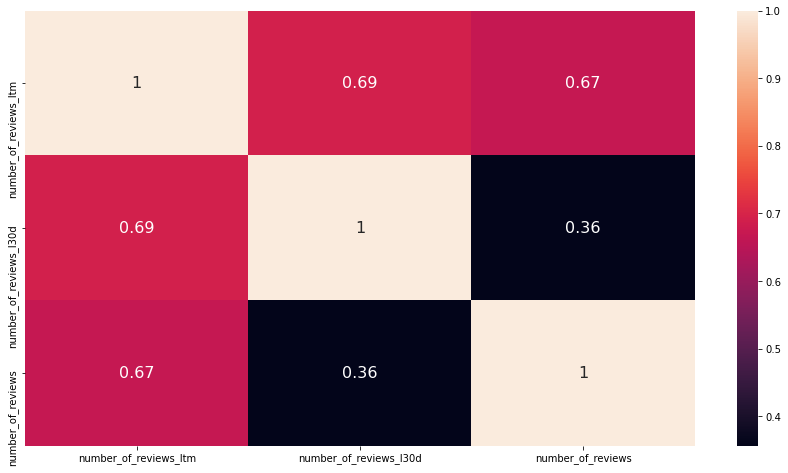

In [13]:
corr = Washington_listings[['number_of_reviews_ltm', 'number_of_reviews_l30d', 'number_of_reviews']].corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, annot_kws = {"size" : 16})

<AxesSubplot:>

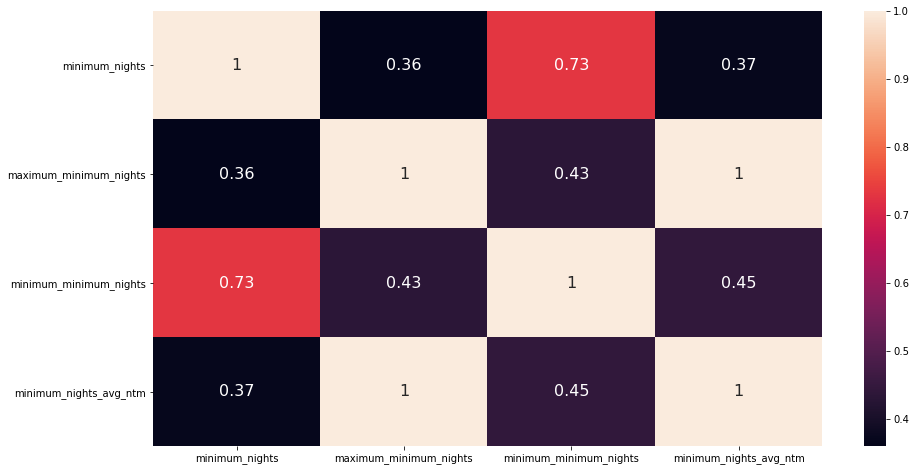

In [14]:
corr = Washington_listings[['minimum_nights', 'maximum_minimum_nights', 'minimum_minimum_nights', 
                            'minimum_nights_avg_ntm']].corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, annot_kws = {"size" : 16})

<AxesSubplot:>

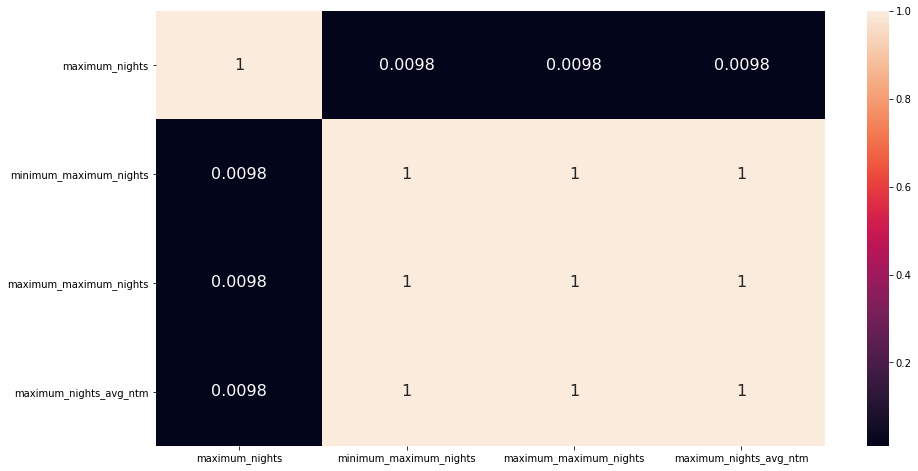

In [15]:
corr = Washington_listings[['maximum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 
                            'maximum_nights_avg_ntm']].corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, annot_kws = {"size" : 16})

<AxesSubplot:>

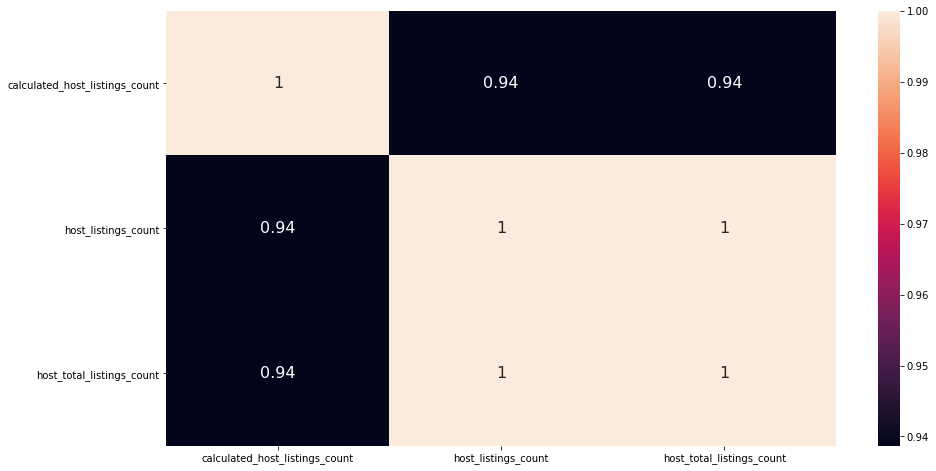

In [16]:
corr = Washington_listings[['calculated_host_listings_count', 'host_listings_count', 'host_total_listings_count']].corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, annot_kws = {"size" : 16})

# EDA

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

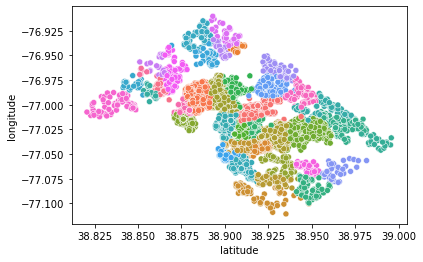

In [17]:
sns.scatterplot(x='latitude', y='longitude', hue='neighbourhood_cleansed', data=Washington_listings, legend=False)

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

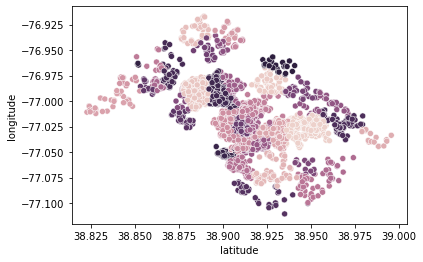

In [18]:
sns.scatterplot(x='latitude', y='longitude', hue='neighbourhood_cleansed', data=preprocessed, legend=False)

<AxesSubplot:xlabel='number_of_reviews_ltm', ylabel='Count'>

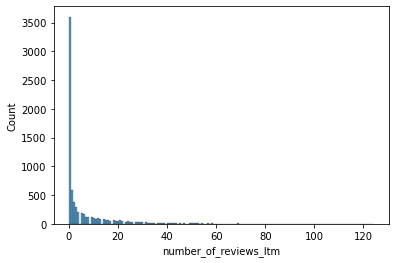

In [19]:
sns.histplot(Washington_listings['number_of_reviews_ltm'])

<AxesSubplot:xlabel='number_of_reviews_l30d', ylabel='Count'>

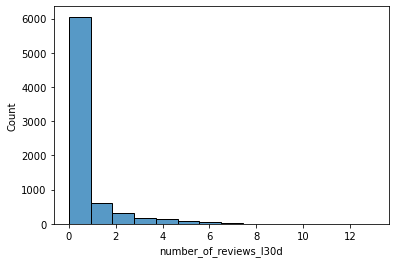

In [20]:
sns.histplot(Washington_listings['number_of_reviews_l30d'])

C:\Users\yangs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='number_of_reviews_l30d', ylabel='count'>

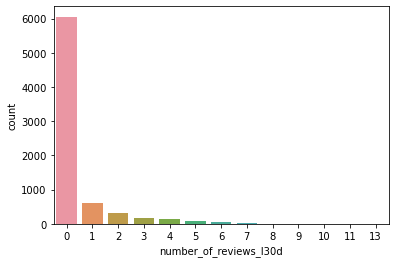

In [21]:
sns.countplot(Washington_listings['number_of_reviews_l30d'])

In [22]:
preprocessed[['price']].describe()

,price
count,3411.000000
mean,140.106127
std,161.713518
min,18.000000
25%,70.000000
50%,100.000000
75%,155.000000
max,4000.000000


Text(0, 0.5, 'count')

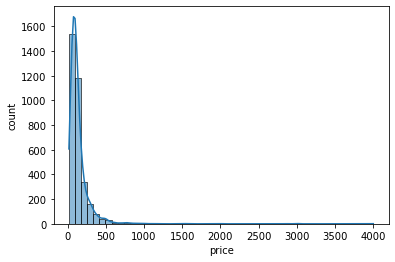

In [23]:
# imbalanced

sns.histplot(preprocessed['price'], bins=50, kde=True)
plt.xlabel('price')
plt.ylabel('count')

Text(0, 0.5, 'count')

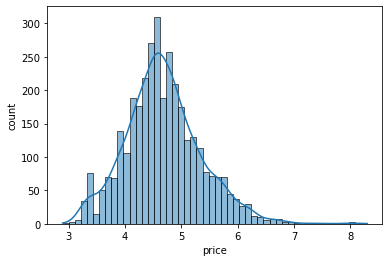

In [24]:
# balanced

sns.histplot(np.log(preprocessed['price']), bins=50, kde=True)
plt.xlabel('price')
plt.ylabel('count')

In [25]:
preprocessed[['reviews_per_month']].describe()

,reviews_per_month
count,3411.000000
mean,1.800718
std,1.739318
min,0.010000
25%,0.440000
50%,1.230000
75%,2.675000
max,11.370000


<AxesSubplot:xlabel='neighbourhood_cleansed', ylabel='price'>

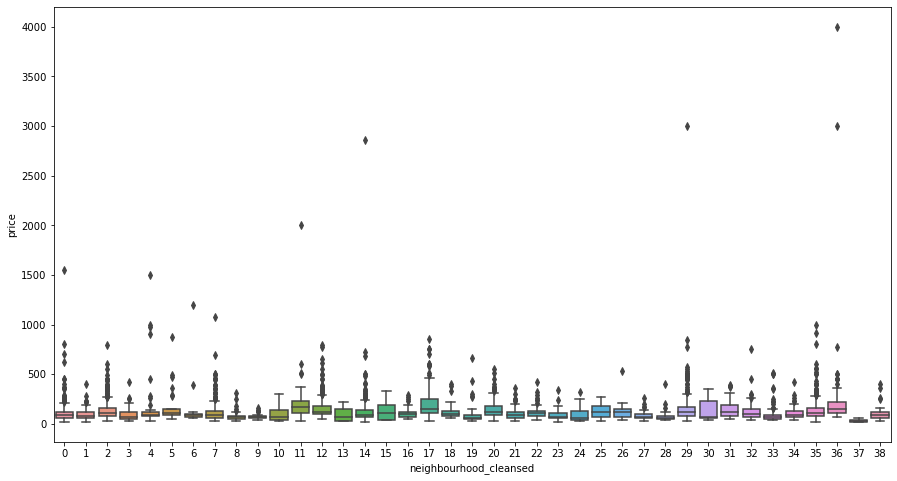

In [26]:
plt.figure(figsize=(15,8))
sns.boxplot(x='neighbourhood_cleansed', y='price', data=preprocessed)

(0.0, 1000.0)

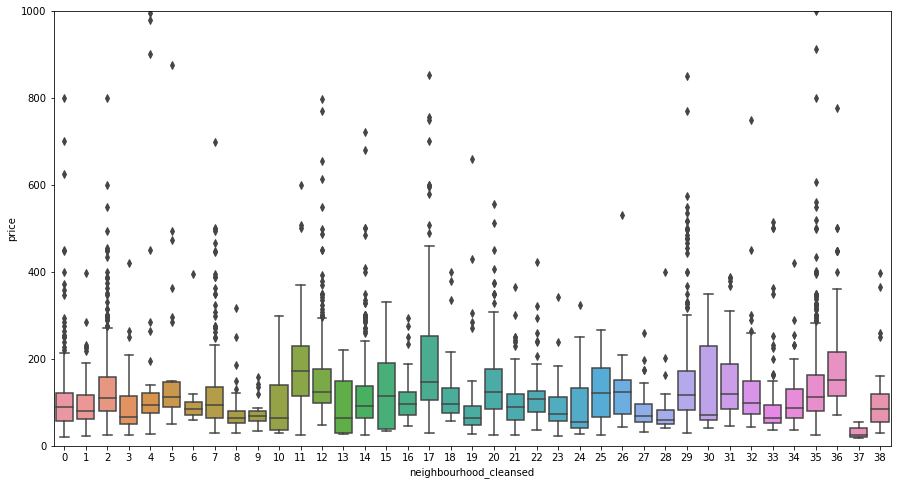

In [27]:
plt.figure(figsize=(15,8))
sns.boxplot(x='neighbourhood_cleansed', y='price', data=preprocessed)
plt.ylim(0, 1000)

C:\Users\yangs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([<matplotlib.axis.XTick at 0x20a16014250>,
 [Text(0, 0, 'Entire home/apt'),
  Text(1, 0, 'Hotel room'),
  Text(2, 0, 'Private room'),
  Text(3, 0, 'Shared room')])

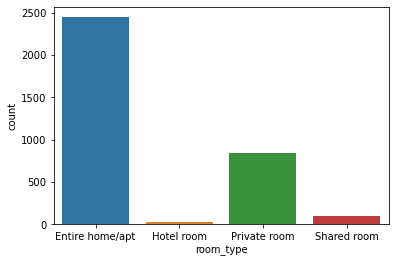

In [28]:
sns.countplot(preprocessed['room_type'])

encoder = LabelEncoder()
encoder.fit(Washington_listings['room_type'])

plt.xticks([0,1,2,3], labels=list(encoder.classes_))

([<matplotlib.axis.XTick at 0x20a14d74910>,
 [Text(0, 0, 'Entire home/apt'),
  Text(1, 0, 'Hotel room'),
  Text(2, 0, 'Private room'),
  Text(3, 0, 'Shared room')])

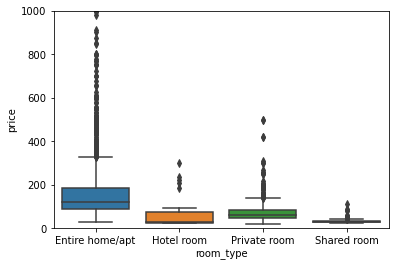

In [29]:
sns.boxplot(x='room_type', y='price', data=preprocessed)
plt.ylim(0, 1000)

encoder = LabelEncoder()
encoder.fit(Washington_listings['room_type'])

plt.xticks([0,1,2,3], labels=list(encoder.classes_))

In [30]:
preprocessed.columns

Index(['id', 'host_since', 'host_response_time', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'room_type',
       'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities',
       'price', 'minimum_nights', 'maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews_ltm',
       'review_scores_rating', 'instant_bookable',
       'calculated_host_listings_count', 'reviews_per_month', 'reviews'],
      dtype='object')

In [31]:
preprocessed[['reviews_per_month']].describe()

,reviews_per_month
count,3411.000000
mean,1.800718
std,1.739318
min,0.010000
25%,0.440000
50%,1.230000
75%,2.675000
max,11.370000


<AxesSubplot:xlabel='reviews_per_month', ylabel='Count'>

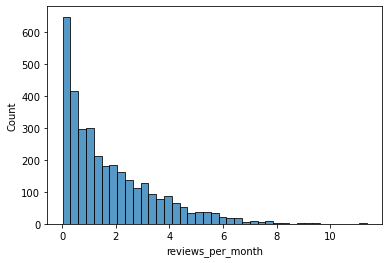

In [32]:
# imbalanced

sns.histplot(preprocessed['reviews_per_month'])

<AxesSubplot:xlabel='reviews_per_month', ylabel='Count'>

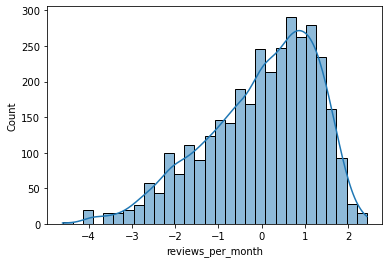

In [33]:
# balanced

sns.histplot(np.log(preprocessed['reviews_per_month']), kde=True)

In [34]:
preprocessed[['reviews']].describe()

,reviews
count,3411.000000
mean,9.678540
std,0.578842
min,2.000000
25%,9.500000
50%,9.833333
75%,10.000000
max,10.000000


<AxesSubplot:xlabel='reviews', ylabel='Count'>

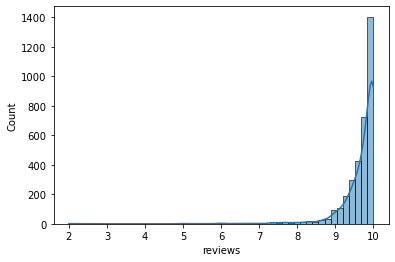

In [35]:
# imbalanced

sns.histplot(preprocessed['reviews'], bins=50, kde=True)

<AxesSubplot:xlabel='reviews', ylabel='Count'>

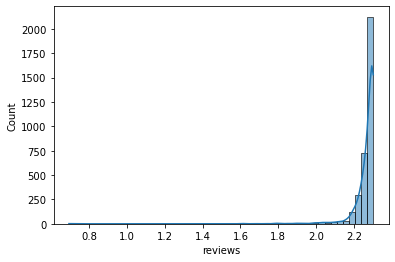

In [36]:
# balanced

sns.histplot(np.log(preprocessed['reviews']), kde=True, bins=50)

In [37]:
preprocessed[['calculated_host_listings_count']].describe()

,calculated_host_listings_count
count,3411.000000
mean,12.372618
std,36.946944
min,1.000000
25%,1.000000
50%,2.000000
75%,6.000000
max,232.000000


<AxesSubplot:xlabel='calculated_host_listings_count', ylabel='Count'>

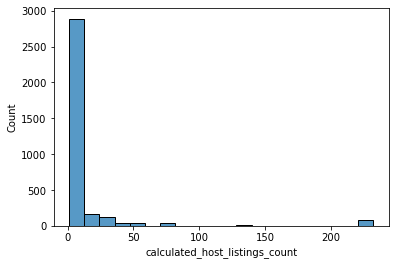

In [38]:
# imbalanced

sns.histplot(preprocessed['calculated_host_listings_count'], bins=20)

<AxesSubplot:xlabel='calculated_host_listings_count', ylabel='Count'>

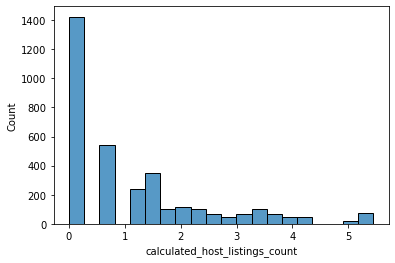

In [39]:
# balanced

sns.histplot(np.log(preprocessed['calculated_host_listings_count']), bins=20)

In [44]:
preprocessed[['minimum_nights']].describe()

,minimum_nights
count,3411.000000
mean,6.474934
std,18.960637
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,600.000000


<AxesSubplot:xlabel='minimum_nights', ylabel='Count'>

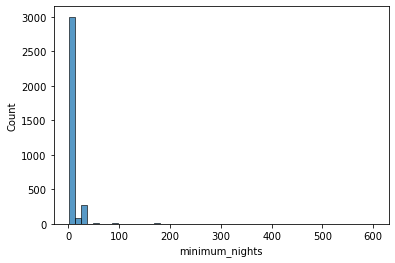

In [45]:
# imbalanced

sns.histplot(preprocessed['minimum_nights'], bins=50)

<AxesSubplot:xlabel='minimum_nights', ylabel='Count'>

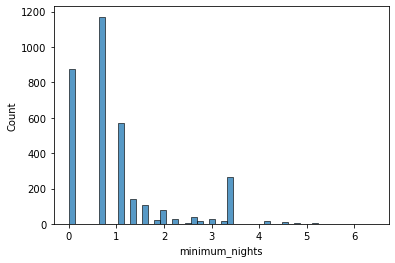

In [46]:
# balanced

sns.histplot(np.log(preprocessed['minimum_nights']), bins=50)

In [47]:
preprocessed[['maximum_nights']].describe()

,maximum_nights
count,3.411000e+03
mean,2.997451e+04
std,1.712207e+06
min,1.000000e+00
25%,6.000000e+01
50%,1.125000e+03
75%,1.125000e+03
max,1.000000e+08


<AxesSubplot:xlabel='maximum_nights', ylabel='Count'>

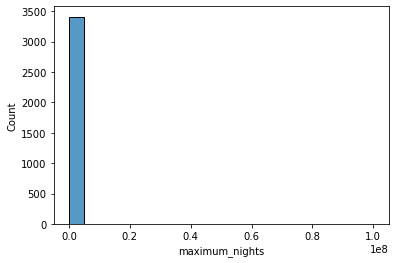

In [51]:
# imbalanced

sns.histplot(preprocessed['maximum_nights'], bins=20)

<AxesSubplot:xlabel='maximum_nights', ylabel='Count'>

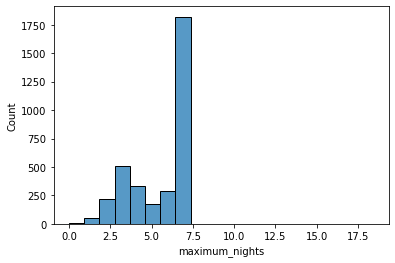

In [52]:
# balanced

sns.histplot(np.log(preprocessed['maximum_nights']), bins=20)

In [62]:
tmp = Washington_listings[['maximum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 
                            'maximum_nights_avg_ntm']]

tmp['maximum_nights_normalized'] = np.log(Washington_listings['maximum_nights'])

<ipython-input-62-4e8c9892cfea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['maximum_nights_normalized'] = np.log(Washington_listings['maximum_nights'])


<AxesSubplot:>

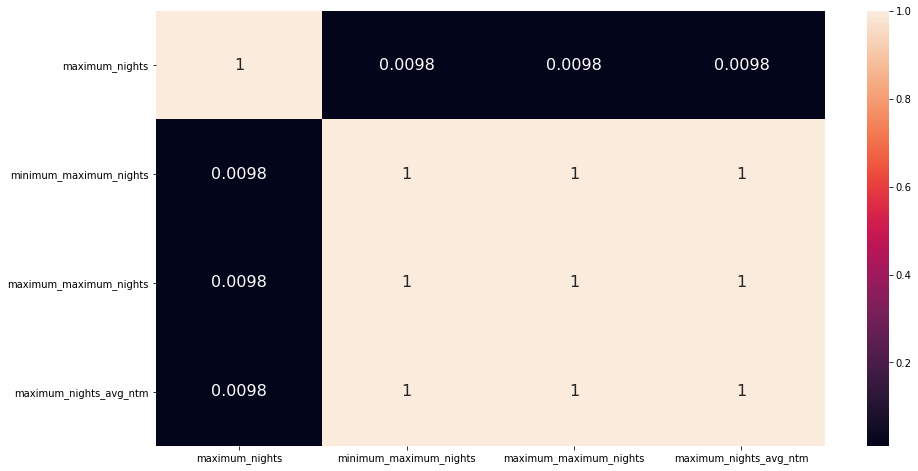

In [63]:
# normalize 하기 전

corr = tmp[['maximum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 
                            'maximum_nights_avg_ntm']].corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, annot_kws = {"size" : 16})

<AxesSubplot:>

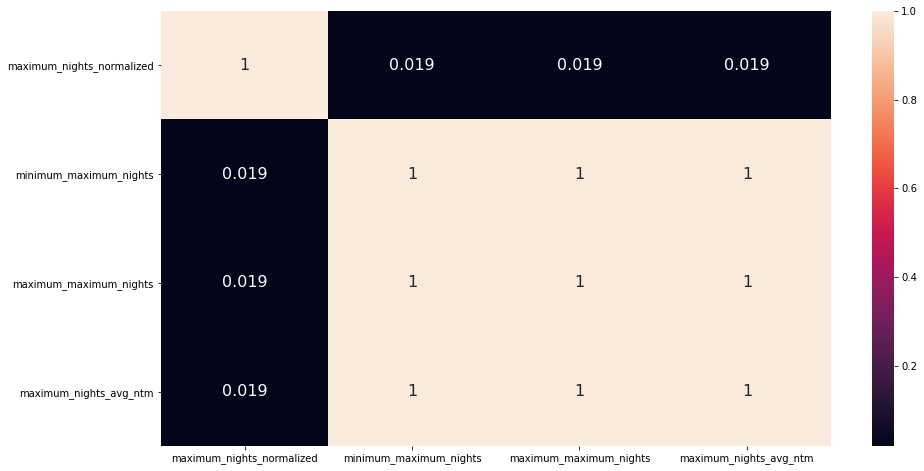

In [64]:
# normalize 한 후

corr = tmp[['maximum_nights_normalized', 'minimum_maximum_nights', 'maximum_maximum_nights', 
                            'maximum_nights_avg_ntm']].corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, annot_kws = {"size" : 16})

In [65]:
tmp = Washington_listings[['minimum_nights', 'maximum_minimum_nights', 'minimum_minimum_nights', 
                            'minimum_nights_avg_ntm']]

tmp['minimum_nights_normalized'] = np.log(Washington_listings['minimum_nights'])

<ipython-input-65-db7eae72e6b3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['minimum_nights_normalized'] = np.log(Washington_listings['minimum_nights'])


<AxesSubplot:>

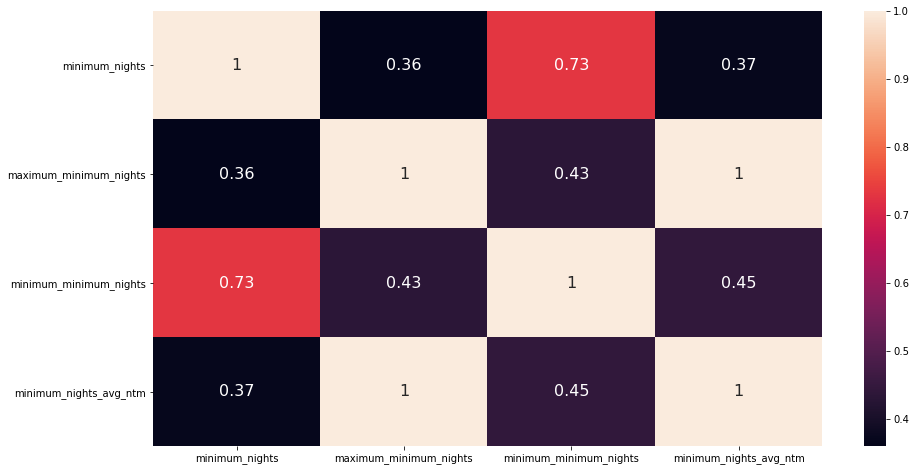

In [69]:
# normalize 하기 전

corr = tmp[['minimum_nights', 'maximum_minimum_nights', 'minimum_minimum_nights', 
                            'minimum_nights_avg_ntm']].corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, annot_kws = {"size" : 16})

<AxesSubplot:>

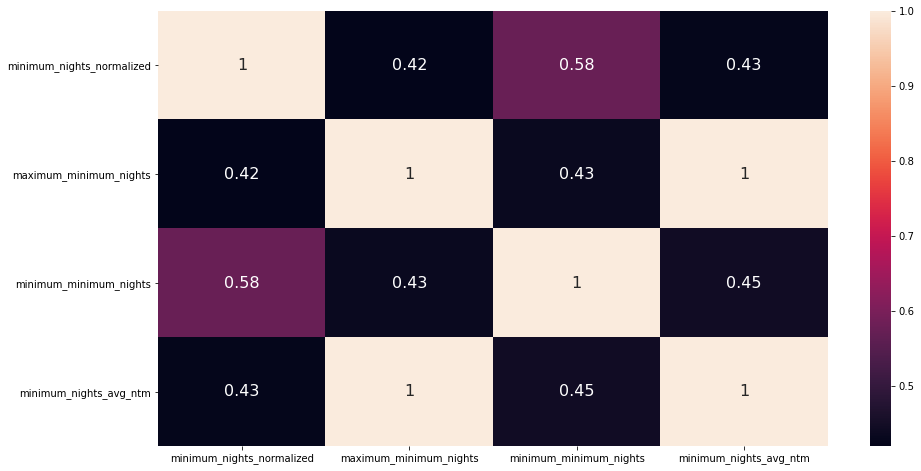

In [68]:
# normalize 한 후

corr = tmp[['minimum_nights_normalized', 'maximum_minimum_nights', 'minimum_minimum_nights', 
                            'minimum_nights_avg_ntm']].corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, annot_kws = {"size" : 16})